In [1]:
% matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
bangladesh_2011 = pd.read_csv("../data/Bangladesh_CE_2011_pc.csv")
bangladesh_exp_2011 = bangladesh_2011.groupby("village")["totexp_m_pc"].mean()

In [4]:
bangladesh_2015 = pd.read_csv("../data/Bangladesh_CE_2015_pc.csv")
bangladesh_exp_2015 = bangladesh_2015.groupby("Village")["totexp_m_pc"].mean()

In [5]:
india_df = pd.read_csv("../data/india_processed.csv")

KeyboardInterrupt: 

In [ ]:
india_cons = india_df["secc_cons_per_cap_scaled"][india_df["secc_cons_per_cap_scaled"] < 5]

In [ ]:
orig_cons = pd.read_csv("../data/india.csv")["secc_cons_per_cap_scaled"]

In [6]:
mu, sd = np.mean(orig_cons), np.std(orig_cons)

NameError: name 'orig_cons' is not defined

In [7]:
village_idxs = bangladesh_2015.groupby("Village").apply(lambda x: x.sample())["a01"].reset_index()

(array([ 27.,  84., 111.,  64.,  21.,  11.,   2.,   1.,   1.,   1.]),
 array([1824.36733871, 2504.3076929 , 3184.24804708, 3864.18840126,
        4544.12875544, 5224.06910963, 5904.00946381, 6583.94981799,
        7263.89017218, 7943.83052636, 8623.77088054]),
 <a list of 10 Patch objects>)

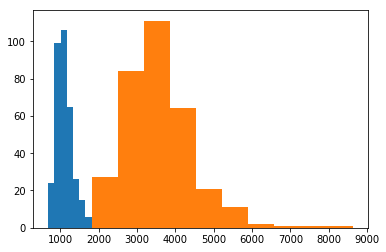

In [8]:
plt.hist(bangladesh_exp_2015)
plt.hist(bangladesh_exp_2011)

In [6]:
village_cons = (bangladesh_exp_2015 - np.mean(bangladesh_exp_2015)) / np.std(bangladesh_exp_2015)

In [46]:
bangladesh_test = pd.DataFrame({
  "totexp_m_pc": village_cons.reset_index()["totexp_m_pc"],
  "village": village_cons.reset_index()["Village"],
  "a01": village_idxs["a01"]
})

In [63]:
disk_files = set([s.strip() for s in open("../data/disk_bucket.txt", "r").readlines()])

In [66]:
bangladesh_test["s1_path"] = bangladesh_test["a01"].apply(lambda i: "s1_median_bangladesh_vis_500x500_{:.1f}.tif".format(i))

In [67]:
bangladesh_test["l8_path"] = bangladesh_test["a01"].apply(lambda i: "l8_median_bangladesh_vis_500x500_{:.1f}.tif".format(i))

In [69]:
bangladesh_test = bangladesh_test[np.logical_and(bangladesh_test["l8_path"].isin(disk_files),
                                     bangladesh_test["s1_path"].isin(disk_files))]

In [70]:
len(bangladesh_test)

305

In [71]:
bangladesh_test.to_csv("../data/bangladesh_test.csv")

(array([ 3.,  8., 10., 15., 31., 38., 40., 33., 15., 24., 22., 13.,  9.,
        11.,  6.,  5.,  4.,  5.,  2.,  1.,  3.,  1.,  1.,  2.,  1.,  0.,
         0.,  0.,  0.,  2.]),
 array([-1.79452704, -1.57502128, -1.35551551, -1.13600974, -0.91650397,
        -0.6969982 , -0.47749244, -0.25798667, -0.0384809 ,  0.18102487,
         0.40053064,  0.6200364 ,  0.83954217,  1.05904794,  1.27855371,
         1.49805948,  1.71756524,  1.93707101,  2.15657678,  2.37608255,
         2.59558832,  2.81509409,  3.03459985,  3.25410562,  3.47361139,
         3.69311716,  3.91262293,  4.13212869,  4.35163446,  4.57114023,
         4.790646  ]),
 <a list of 30 Patch objects>)

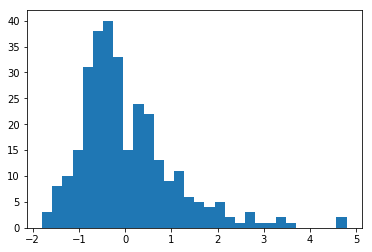

In [89]:
plt.hist(np.load("/home/tony/y_true.npy"), bins=30)

In [106]:
truth = np.load("/home/tony/predicting-poverty/results/fold_1/y_true.npy")

In [105]:
l8_pred = np.load("/home/tony/predicting-poverty/results/fold_1//y_pred_l8.npy")

In [104]:
s1_pred = np.load("/home/tony/predicting-poverty/results/fold_1//y_pred_s1.npy")

In [97]:
import scipy.stats as sp

In [98]:
sp.pearsonr(l8_pred, s1_pred)

(-0.05758285312095517, 0.316177506315869)

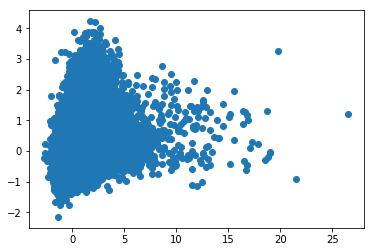

In [108]:
plt.scatter(truth, s1_pred)

(array([ 1.,  2.,  0.,  1.,  2.,  3.,  1.,  8., 15., 11., 11., 11., 15.,
        18., 32., 32., 35., 20., 22., 12., 14., 16.,  5.,  2.,  5.,  5.,
         4.,  0.,  0.,  2.]),
 array([-1.33575153, -1.24839455, -1.16103756, -1.07368058, -0.9863236 ,
        -0.89896661, -0.81160963, -0.72425264, -0.63689566, -0.54953867,
        -0.46218169, -0.3748247 , -0.28746772, -0.20011073, -0.11275375,
        -0.02539676,  0.06196022,  0.1493172 ,  0.23667419,  0.32403117,
         0.41138816,  0.49874514,  0.58610213,  0.67345911,  0.7608161 ,
         0.84817308,  0.93553007,  1.02288705,  1.11024404,  1.19760102,
         1.284958  ]),
 <a list of 30 Patch objects>)

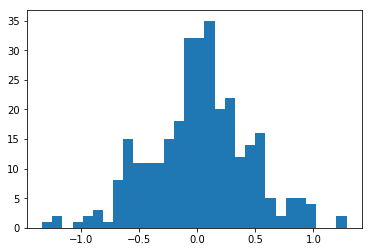

In [91]:
plt.hist(np.load("/home/tony/y_pred_s1.npy"), bins=30)

In [88]:
y_pred_s1

NameError: name 'y_pred_s1' is not defined